In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math, datetime
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import style

style.use("ggplot")

In [77]:
file = pd.read_csv("Bitcoin.csv")

file

,Date,Open,High,Low,Close,Volume,Market Cap
0,Apr-03-2023,27807.768336,28405.398900,27695.278300,28149.681400,4.102580e+10,5.427709e+11
1,Apr-02-2023,28170.777200,28427.734600,27405.981206,27761.458669,3.601926e+10,5.409972e+11
2,Apr-01-2023,28452.740207,28515.943600,27879.054800,28188.180100,2.611537e+10,5.465454e+11
3,Mar-31-2023,28467.882850,28789.407800,28305.246500,28464.814018,3.655711e+10,5.498745e+11
4,Mar-30-2023,28028.484128,28614.037800,27663.050387,28467.196629,4.507722e+10,5.450632e+11
5,Mar-29-2023,28348.543700,29156.380700,27774.748000,28031.595199,4.625818e+10,5.485283e+11
6,Mar-28-2023,27266.671800,28586.001100,27252.702900,28370.769200,4.248215e+10,5.427958e+11
7,Mar-27-2023,27131.207200,27446.162400,26676.950298,27259.220700,4.306123e+10,5.223297e+11
8,Mar-26-2023,27970.498835,28016.615500,26698.479700,27157.570100,3.464236e+10,5.323549e+11
9,Mar-25-2023,27493.601000,28139.207977,27430.913700,27983.589034,2.711136e+10,5.366404e+11


In [78]:
new_df = file[["Date", "Open", "High", "Low", "Close", "Volume"]]
# new_df["Sn_no"] = np.arange(1826)
# new_df = new_df.sort_values("Sn_no", ascending=False)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    30 non-null     object 
 1   Open    30 non-null     float64
 2   High    30 non-null     float64
 3   Low     30 non-null     float64
 4   Close   30 non-null     float64
 5   Volume  30 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.5+ KB


In [79]:
new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    30 non-null     datetime64[ns]
 1   Open    30 non-null     float64       
 2   High    30 non-null     float64       
 3   Low     30 non-null     float64       
 4   Close   30 non-null     float64       
 5   Volume  30 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.5 KB


C:\Users\shahs\AppData\Local\Temp\ipykernel_3808\2126293450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Date'] = pd.to_datetime(new_df['Date'])


In [80]:
new_df['Date'] = new_df['Date'].dt.strftime('%Y-%m-%d')
new_df

C:\Users\shahs\AppData\Local\Temp\ipykernel_3808\3087938958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Date'] = new_df['Date'].dt.strftime('%Y-%m-%d')


,Date,Open,High,Low,Close,Volume
0,2023-04-03,27807.768336,28405.398900,27695.278300,28149.681400,4.102580e+10
1,2023-04-02,28170.777200,28427.734600,27405.981206,27761.458669,3.601926e+10
2,2023-04-01,28452.740207,28515.943600,27879.054800,28188.180100,2.611537e+10
3,2023-03-31,28467.882850,28789.407800,28305.246500,28464.814018,3.655711e+10
4,2023-03-30,28028.484128,28614.037800,27663.050387,28467.196629,4.507722e+10
5,2023-03-29,28348.543700,29156.380700,27774.748000,28031.595199,4.625818e+10
6,2023-03-28,27266.671800,28586.001100,27252.702900,28370.769200,4.248215e+10
7,2023-03-27,27131.207200,27446.162400,26676.950298,27259.220700,4.306123e+10
8,2023-03-26,27970.498835,28016.615500,26698.479700,27157.570100,3.464236e+10
9,2023-03-25,27493.601000,28139.207977,27430.913700,27983.589034,2.711136e+10


In [81]:
data = new_df.drop(labels="Date", axis=1)
df_index = pd.Index(new_df["Date"])
real_data = data.set_index(df_index)
# count = new_df[:].isna().sum()
# count
real_data

,Open,High,Low,Close,Volume
Date,,,,,
2023-04-03,27807.768336,28405.398900,27695.278300,28149.681400,4.102580e+10
2023-04-02,28170.777200,28427.734600,27405.981206,27761.458669,3.601926e+10
2023-04-01,28452.740207,28515.943600,27879.054800,28188.180100,2.611537e+10
2023-03-31,28467.882850,28789.407800,28305.246500,28464.814018,3.655711e+10
2023-03-30,28028.484128,28614.037800,27663.050387,28467.196629,4.507722e+10
2023-03-29,28348.543700,29156.380700,27774.748000,28031.595199,4.625818e+10
2023-03-28,27266.671800,28586.001100,27252.702900,28370.769200,4.248215e+10
2023-03-27,27131.207200,27446.162400,26676.950298,27259.220700,4.306123e+10
2023-03-26,27970.498835,28016.615500,26698.479700,27157.570100,3.464236e+10


In [82]:
real_data["HL_pct"] = ((real_data["High"] - real_data["Low"]) / real_data["Low"]) * 100
real_data["PCT_change"] = ((real_data["Open"] - real_data["Close"]) / real_data["Close"]) * 100
df = real_data[["Close", "Volume", "HL_pct", "PCT_change"]]
df

,Close,Volume,HL_pct,PCT_change
Date,,,,
2023-04-03,28149.681400,4.102580e+10,2.564049,-1.214625
2023-04-02,27761.458669,3.601926e+10,3.728213,1.474413
2023-04-01,28188.180100,2.611537e+10,2.284471,0.938550
2023-03-31,28464.814018,3.655711e+10,1.710500,0.010781
2023-03-30,28467.196629,4.507722e+10,3.437753,-1.541116
2023-03-29,28031.595199,4.625818e+10,4.974420,1.130683
2023-03-28,28370.769200,4.248215e+10,4.892352,-3.891672
2023-03-27,27259.220700,4.306123e+10,2.883433,-0.469615
2023-03-26,27157.570100,3.464236e+10,4.937119,2.993378


In [83]:
forecast_col = df["Close"]
forecast_out = int(math.ceil(0.01*len(df)))
forecast_out
# 0.1*len(df)

1

In [84]:
df["label"] = df["Close"].shift(-forecast_out)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 2023-04-03 to 2023-03-05
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close       30 non-null     float64
 1   Volume      30 non-null     float64
 2   HL_pct      30 non-null     float64
 3   PCT_change  30 non-null     float64
 4   label       29 non-null     float64
dtypes: float64(5)
memory usage: 1.4+ KB


C:\Users\shahs\AppData\Local\Temp\ipykernel_3808\816817077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = df["Close"].shift(-forecast_out)


In [85]:
X = np.array(df.drop(labels="label", axis=1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out: ]
df.dropna(inplace=True)
y = np.array(df["label"])
print(len(X),len(y))

29 29


c:\Users\shahs\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
C:\Users\shahs\AppData\Local\Temp\ipykernel_3808\2287377475.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)
df["Forecast"] = np.nan


[22429.33403845] 0.9997809047322935 1


C:\Users\shahs\AppData\Local\Temp\ipykernel_3808\2432951961.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Forecast"] = np.nan


In [87]:
last_date = df.iloc[-1].name
element = datetime.datetime.strptime(last_date,"%Y-%m-%d")

In [88]:
last_unix = datetime.datetime.timestamp(element)
one_day = 86400
next_unix = last_unix + one_day

In [89]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

C:\Users\shahs\AppData\Local\Temp\ipykernel_3808\2290587006.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]


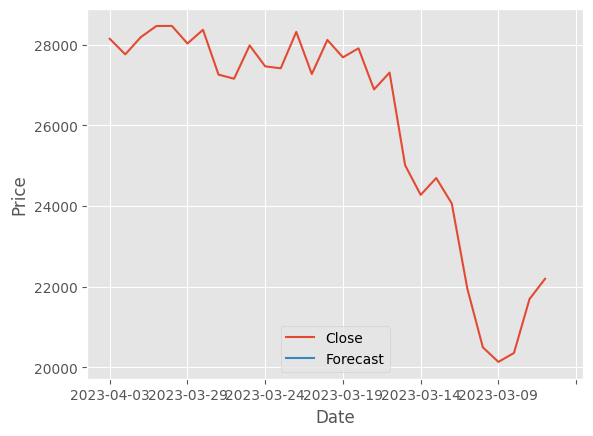

<Figure size 5000x5000 with 0 Axes>

In [90]:
df["Close"].plot()
df["Forecast"].plot()
plt.legend(loc=8)
plt.xlabel("Date")
plt.ylabel("Price")
plt.figure(figsize=(50,50), dpi=100)
plt.show()